# FIFA Project

### Project Overview

A data scientist wishes to make it big by becoming a football club manager. The aim is to found out the best squad for the upcoming football championship.

#### Features:
- **Name**: Player name
- **Age**: Age of the player
- **Nationality**: Country name
- **Overall**: Value of the player
- **Potential**: Strength of the player
- **Club**:	Club name of the player
- **Value**: Income
- **Prefered position**: Position of the player
- **Wage**: Monthly income

#### Objective:
The aim is to found out the best squad for the upcoming football championship

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fifa-GP.csv')

C:\Users\Mrunal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(17981, 74)

In [5]:
df = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Preferred Positions', 'Wage']]

In [6]:
df.shape

(17981, 9)

In [7]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW,€565K
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,€565K
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,€280K
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,€510K
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,€230K


In [8]:
df['Unit'] = df['Value'].str[-1]
df['Value (M)'] = np.where(df['Unit'] == '0', 0, df['Value'].str[1:-1].replace(r'[a-zA-Z]', ''))
df['Value (M)'] = df['Value (M)'].astype(float)
df['Value (M)'] = np.where(df['Unit'] == 'M', df['Value (M)'], df['Value (M)']/1000)

# Removes the symbol from Wage
df['Unit2'] = df['Wage'].str[-1]
df['Wage (M)'] = np.where(df['Unit2'] == '0', 0, df['Wage'].str[1:-1].replace(r'[a-zA-Z]', ''))
df['Wage (M)'] = df['Wage (M)'].astype(float)
df['Wage (M)'] = np.where(df['Unit2'] == 'M', df['Wage (M)'], df['Wage (M)']/1000)

# Drop the Unit and Unit2 from df
df = df.drop(['Unit', 'Unit2'], 1)

df['Position'] = df['Preferred Positions'].str.split().str[0]

In [9]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Wage,Value (M),Wage (M),Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW,€565K,95.5,0.565,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,€565K,105.0,0.565,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,€280K,123.0,0.280,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,€510K,97.0,0.510,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,€230K,61.0,0.230,GK


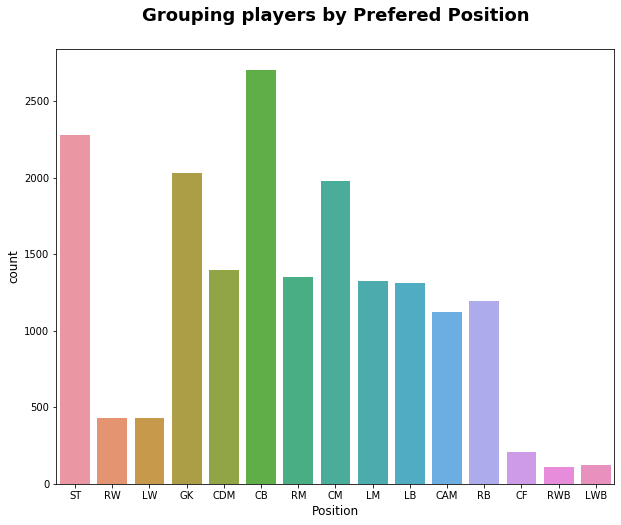

In [10]:
# groups of player by there position
import seaborn as sns

plt.figure(figsize=(10,8))
plt.title('Grouping players by Prefered Position', fontsize=18, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=12)
plt.ylabel('Players Age', fontsize=12)
sns.countplot(x="Position", data= df)

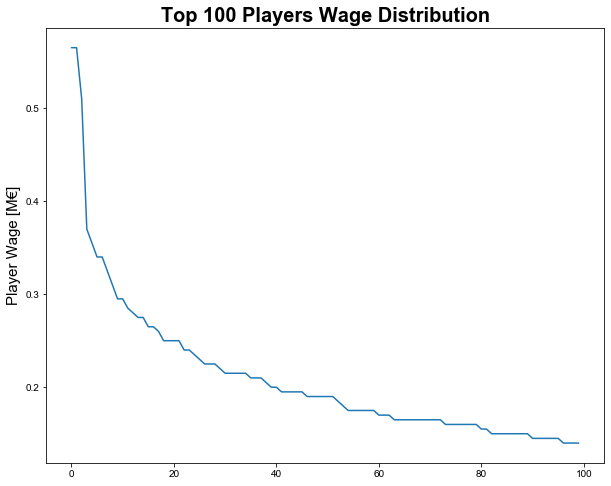

In [11]:
# Wage distribution of top 100 players

value_distribution_values = df.sort_values("Wage (M)", ascending=False).reset_index().head(100)[["Name", "Wage (M)"]]
plt.figure(figsize=(10,8))
plt.title('Top 100 Players Wage Distribution', fontsize=20, fontweight='bold')
plt.ylabel('Player Wage [M€]', fontsize=15)
sns.set_style("whitegrid")
plt.plot(value_distribution_values['Wage (M)'])

<Figure size 432x288 with 0 Axes>

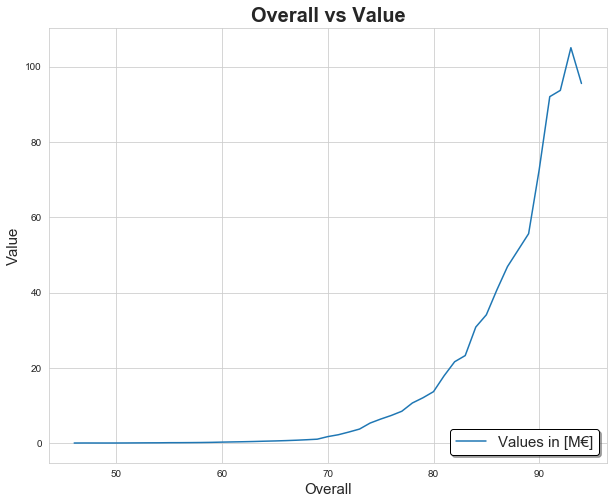

In [12]:
# Comparision graph of Overall vs values(M)

overall = df.sort_values('Overall')['Overall'].unique()
overall_value = df.groupby(['Overall'])['Value (M)'].mean()
    
plt.figure()
plt.figure(figsize=(10,8))
plt.title('Overall vs Value', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, overall_value, label="Values in [M€]")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")


In [13]:
# Finding the best squad

p_list_1= ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']

p_list_2 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']


df_copy = df.copy()
store = []
for i in p_list_1:
    store.append([i,
                    df_copy.loc[[df_copy[df_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(
                        index=False), df_copy[df_copy['Position'] == i]['Overall'].max()])
df_copy.drop(df_copy[df_copy['Position'] == i]['Overall'].idxmax(), inplace=True)
# return store
df1= pd.DataFrame(np.array(store).reshape(11, 3), columns=['Position', 'Player', 'Overall'])


# p_list_2 stats
df_copy = df.copy()
store = []
for i in p_list_2:
    store.append([i,
                    df_copy.loc[[df_copy[df_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(
                        index=False), df_copy[df_copy['Position'] == i]['Overall'].max()])
df_copy.drop(df_copy[df_copy['Position'] == i]['Overall'].idxmax(), inplace=True)
# return store
df2= pd.DataFrame(np.array(store).reshape(11, 3), columns=['Position', 'Player', 'Overall'])

if df1['Overall'].mean() > df2['Overall'].mean():
        print(df1)
        print(p_list_1)
else:
    print(df2)
    print(p_list_2)

   Position              Player Overall
0        GK            M. Neuer      92
1        LB             Marcelo      87
2        CB        Sergio Ramos      90
3        CB        Sergio Ramos      90
4        RB            Carvajal      84
5        LM          C. Eriksen      87
6       CDM            T. Kroos      90
7        RM        K. De Bruyne      89
8        LW              Neymar      92
9        ST   Cristiano Ronaldo      94
10       RW            L. Messi      93
['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']


In [14]:
# Player transfer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split

In [15]:
X = df[['Overall','Potential','Wage (M)']]
y = df['Value (M)']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test,y_pred)
print('R2score:',r2)

mae = mean_absolute_error(y_test,y_pred)
print('MAE:',mae)

R2score: 0.746327813472971
MAE: 1.3945951276637265


In [16]:
#Introducing polynomial functions

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_2,y_train)
y_pred_2 = model.predict(X_test_2)

r2 = r2_score(y_test,y_pred_2)
print('R2score:',r2)

mae = mean_absolute_error(y_test,y_pred_2)
print('MAE:',mae)

R2score: 0.9307805489665879
MAE: 0.5326507222776308


#### R2 score improves and Error reduces by introducing polynomial features